## Model 15 - with Quality of life data (728 observations!!)

### Target:
+ life_ladder  

### Features from Happiness:
+ log_gdp_per_capita
+ social_support
+ healthy_life_expectancy_at_birth
+
+ perception of corruption
+ positive affect
+ negative affect

### Features from Quality:
+ purchasing_power_index
+ cost_of_living_index
+ pollution_index
+ health_care_index
+ crime_index


import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error 

In [2]:
sns.set_style("darkgrid")

model_name = 'model_15'

function section

In [3]:
def adjusted_r2(y,y_pred, X):
    adjusted_r2 = 1 - ((1 - r2_score(y, y_pred)) * (len(X) - 1) / (len(X) - X.shape[1] - 1))
    return adjusted_r2 

In [4]:
df = pd.read_csv("../data/life_ladder_and_quality_life_combined.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year_x                            728 non-null    int64  
 1   country_name                      728 non-null    object 
 2   life_ladder                       728 non-null    float64
 3   quality_of_life_index             728 non-null    float64
 4   purchasing_power_index            728 non-null    float64
 5   crime_index                       728 non-null    float64
 6   health_care_index                 728 non-null    float64
 7   cost_of_living_index              728 non-null    float64
 8   pollution_index                   728 non-null    float64
 9   log_gdp_per_capita                728 non-null    float64
 10  social_support                    728 non-null    float64
 11  healthy_life_expectancy_at_birth  728 non-null    float64
 12  freedom_

Define features and Target:

In [6]:
df.columns

Index(['year_x', 'country_name', 'life_ladder', 'quality_of_life_index',
       'purchasing_power_index', 'crime_index', 'health_care_index',
       'cost_of_living_index', 'pollution_index', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'perceptions_of_corruption',
       'positive_affect', 'negative_affect'],
      dtype='object')

In [7]:
features = ['log_gdp_per_capita', 'social_support', 'healthy_life_expectancy_at_birth',
                  'perceptions_of_corruption', 'positive_affect', 'negative_affect',
                  'purchasing_power_index','cost_of_living_index','pollution_index', 
                  'health_care_index','crime_index',
                  ]

X = df[features]
y = df['life_ladder']

In [8]:
X.columns

Index(['log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'perceptions_of_corruption',
       'positive_affect', 'negative_affect', 'purchasing_power_index',
       'cost_of_living_index', 'pollution_index', 'health_care_index',
       'crime_index'],
      dtype='object')

In [9]:
print(X.shape, y.shape)

(728, 11) (728,)


Train-Test-Split:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=123)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(582, 11) (146, 11) (582,) (146,)


In [12]:
X_train.describe()

,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,perceptions_of_corruption,positive_affect,negative_affect,purchasing_power_index,cost_of_living_index,pollution_index,health_care_index,crime_index
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,10.147746,0.862029,67.661821,0.710584,0.667904,0.264024,64.604467,58.906357,52.197251,65.704811,41.673368
std,0.694597,0.097667,4.027023,0.220549,0.105292,0.074923,30.424397,23.685892,22.038919,10.965824,13.101992
min,7.602000,0.404000,50.500000,0.047000,0.263000,0.111000,3.300000,19.900000,11.900000,28.300000,5.700000
25%,9.628000,0.823250,65.760000,0.606750,0.590000,0.206000,38.400000,39.225000,32.625000,57.500000,32.025000
50%,10.253500,0.896000,68.145000,0.786000,0.694000,0.253000,58.200000,53.400000,53.600000,67.150000,41.450000
75%,10.690250,0.928000,70.857500,0.877750,0.752000,0.307000,90.700000,74.725000,67.675000,73.875000,48.775000
max,11.660000,0.983000,74.350000,0.977000,0.884000,0.569000,178.700000,136.700000,131.800000,96.100000,85.700000


Scaling with StandartScaler and MinMaxScaler  
we will use the scaled data for KNN and Linear Regression

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scatterplot with scaled and non-scaled data, both features (correlation)

In [14]:
X_train_scaled.shape

(582, 11)

In [15]:
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

<Axes: xlabel='cost_of_living_index', ylabel='life_ladder'>

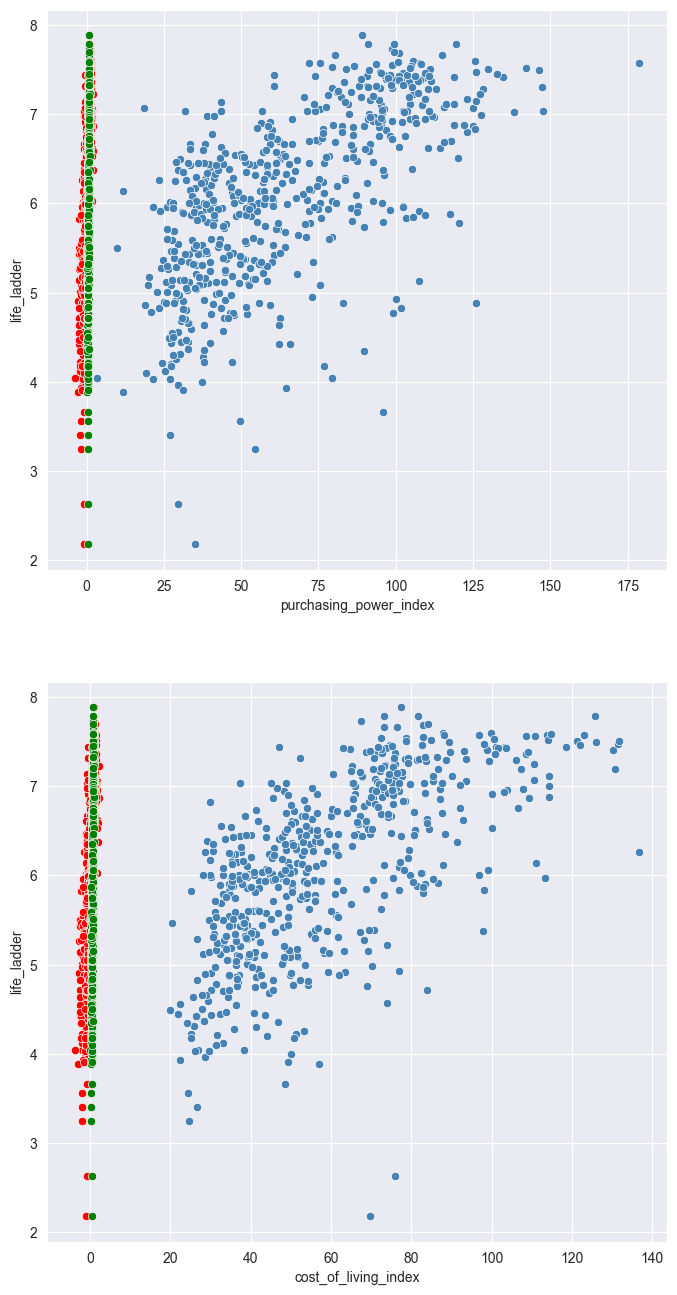

In [16]:
fig,ax = plt.subplots(2,1,figsize=(8,16))
sns.scatterplot(ax= ax[0], x = X_train.purchasing_power_index, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[0], x = X_train_scaled[:,0], y = y_train, color = 'red')
sns.scatterplot(ax= ax[0], x = X_train_normalized[:,0], y = y_train, color = 'green')
sns.scatterplot(ax= ax[1], x = X_train.cost_of_living_index, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[1], x = X_train_scaled[:,0], y = y_train, color = 'red')
sns.scatterplot(ax= ax[1], x = X_train_normalized[:,0], y = y_train, color = 'green')


Remember:   
**R2 should be as high as possible**  

(For example: an R2 of 0.917 will be interpreted as 91,70% of the variation in x can be explained by y (and vice versa). The rest (8,30%) is noise, which cannot refer to the variables.)  

**RMSE should be low as possible**

Linear Regression with variable polynomio

In [17]:
lin_reg_error_lst = []

for i in range(1,3):
    polynomial_features = PolynomialFeatures(degree=i, include_bias=False)
    x_poly_train = polynomial_features.fit_transform(X_train_scaled)
    x_poly_test = polynomial_features.transform(X_test_scaled)

    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(x_poly_train,y_train)

    y_pred_poly_test = lin_reg_poly.predict(x_poly_test)
    y_pred_poly_train = lin_reg_poly.predict(x_poly_train)

    rmse_test = mean_squared_error(y_test, y_pred_poly_test, squared=False).round(3)
    r2_test = adjusted_r2(y_test, y_pred_poly_test, X_test_scaled).round(3)
    rmse_train = mean_squared_error(y_train, y_pred_poly_train, squared=False).round(3)
    r2_train = adjusted_r2(y_train, y_pred_poly_train, X_train_scaled).round(3)
    
    mae_test = mean_absolute_error(y_test, y_pred_poly_test).round(3)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_poly_test).round(3)
    mae_train = mean_absolute_error(y_train, y_pred_poly_train).round(3)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_poly_train).round(3)
    
    delta_rmse = abs(rmse_train - rmse_test)
    delta_r2 = abs(r2_train - r2_test)
    delta_mae = abs(mae_train - mae_test)
    
    model_descrip = model_name + '_lin_reg_' + str(i)
    lin_reg_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})

lin_reg_error_df = pd.DataFrame(lin_reg_error_lst)
lin_reg_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])


,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
0,model_15_lin_reg_1,0.462,0.774,0.333,0.060,0.520,0.725,0.377,0.069,0.058,0.044,0.049
1,model_15_lin_reg_2,0.361,0.862,0.277,0.049,0.468,0.777,0.341,0.061,0.107,0.064,0.085


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_52271/1933425063.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


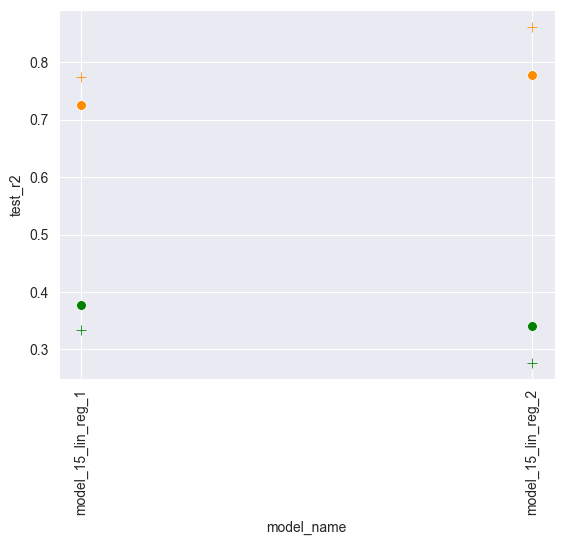

In [18]:
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show();

cross validation for scaled data

In [19]:
lin_reg_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    lin_reg_scaled = LinearRegression()
    cv_scores = cross_val_score(lin_reg_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_lin_reg_scaler_'  + str(count)
    lin_reg_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

lin_reg_cv_score_df = pd.DataFrame(lin_reg_cv_score_lst)
lin_reg_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
0,model_15_lin_reg_scaler_0,0.76
1,model_15_lin_reg_scaler_1,0.76
2,model_15_lin_reg_scaler_2,0.76


part df with the best models:

In [20]:
part_lin_reg = lin_reg_error_df.sort_values(by =['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:3]
part_lin_reg

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
1,model_15_lin_reg_2,0.361,0.862,0.277,0.049,0.468,0.777,0.341,0.061,0.107,0.064,0.085
0,model_15_lin_reg_1,0.462,0.774,0.333,0.060,0.520,0.725,0.377,0.069,0.058,0.044,0.049


---

### KNN Model 

+ with variable number of neighbors and variable distance metrics
+ unscaled!! - now with standart scaler

In [21]:
knn_error_lst = []
for metr in range(1,4):
    for neigh in np.arange(5,26,5): 
        knn = KNeighborsRegressor(n_neighbors=neigh, p=metr, weights='uniform')
        knn.fit(X_train_scaled, y_train)

        y_pred_knn_test = knn.predict(X_test_scaled)
        y_pred_knn_train = knn.predict(X_train_scaled)
        rmse_test = mean_squared_error(y_test, y_pred_knn_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_knn_test, X_test_scaled).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_knn_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_knn_train, X_train_scaled).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_knn_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_knn_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_knn_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_knn_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_knn_' + str(metr) + '_' + str(neigh)
        knn_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})
        
knn_error_df = pd.DataFrame(knn_error_lst)
#knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])
#knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])
knn_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True])
#knn_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
4,model_15_knn_1_25,0.433,0.801,0.316,0.059,0.484,0.762,0.347,0.066,0.051,0.031,0.039
9,model_15_knn_2_25,0.436,0.799,0.322,0.059,0.495,0.752,0.353,0.066,0.059,0.031,0.047
3,model_15_knn_1_20,0.416,0.816,0.302,0.056,0.469,0.777,0.335,0.064,0.053,0.033,0.039
14,model_15_knn_3_25,0.438,0.797,0.324,0.060,0.498,0.748,0.358,0.067,0.060,0.034,0.049
8,model_15_knn_2_20,0.419,0.814,0.308,0.057,0.488,0.758,0.348,0.066,0.069,0.040,0.056
2,model_15_knn_1_15,0.392,0.837,0.285,0.053,0.453,0.792,0.325,0.062,0.061,0.040,0.045
12,model_15_knn_3_15,0.399,0.831,0.292,0.054,0.467,0.779,0.333,0.063,0.068,0.041,0.052
13,model_15_knn_3_20,0.424,0.810,0.313,0.058,0.493,0.753,0.355,0.067,0.069,0.042,0.057
1,model_15_knn_1_10,0.355,0.866,0.252,0.047,0.412,0.828,0.295,0.056,0.057,0.043,0.038
7,model_15_knn_2_15,0.398,0.833,0.290,0.053,0.467,0.779,0.335,0.063,0.069,0.045,0.054


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_52271/1622020098.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


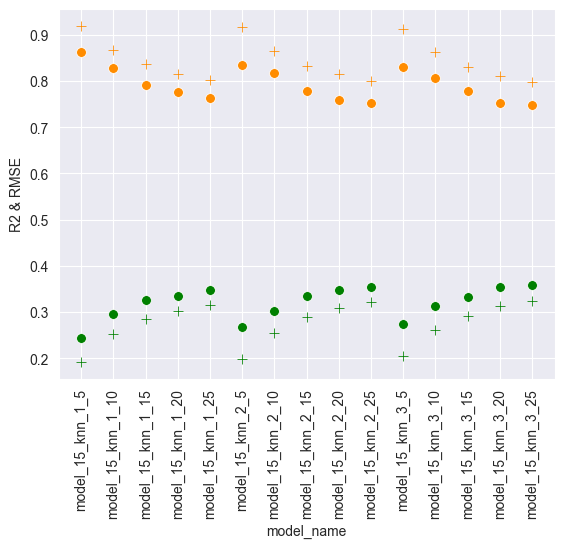

In [22]:
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

In [23]:
#part_knn = knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:5]
#part_knn = knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False]).iloc[:6]
#part_knn = knn_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True]).iloc[:6]
part_knn = knn_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:6]
part_knn

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
0,model_15_knn_1_5,0.277,0.919,0.192,0.036,0.368,0.862,0.244,0.046,0.091,0.052,0.057
5,model_15_knn_2_5,0.281,0.917,0.198,0.037,0.403,0.835,0.267,0.051,0.122,0.069,0.082
10,model_15_knn_3_5,0.288,0.912,0.205,0.038,0.409,0.830,0.275,0.052,0.121,0.070,0.082
1,model_15_knn_1_10,0.355,0.866,0.252,0.047,0.412,0.828,0.295,0.056,0.057,0.043,0.038
6,model_15_knn_2_10,0.358,0.864,0.255,0.047,0.425,0.817,0.303,0.057,0.067,0.048,0.047
11,model_15_knn_3_10,0.360,0.862,0.260,0.048,0.438,0.806,0.313,0.059,0.078,0.053,0.056


scaling data

In [24]:
knn_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    knn_scaled = KNeighborsRegressor(n_neighbors= 40, p = 1)
    cv_scores = cross_val_score(knn_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_knn_scaler_'  + str(count)
    knn_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

knn_cv_score_df = pd.DataFrame(knn_cv_score_lst)
knn_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
2,model_15_knn_scaler_2,0.748
1,model_15_knn_scaler_1,0.746
0,model_15_knn_scaler_0,0.610


Decision Tree Model

In [25]:
dtree = DecisionTreeRegressor(max_depth = 4, 
                            max_leaf_nodes = 10)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10)

In [26]:
y_pred_dec_test = dtree.predict(X_test)
y_pred_dec_train = dtree.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)

print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

train_rmse  0.448
train_r2  0.788
train_mae  0.342
train_mape  0.061
test_rmse  0.461
test_r2  0.784
test_mae  0.36
test_mape  0.065


In [27]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

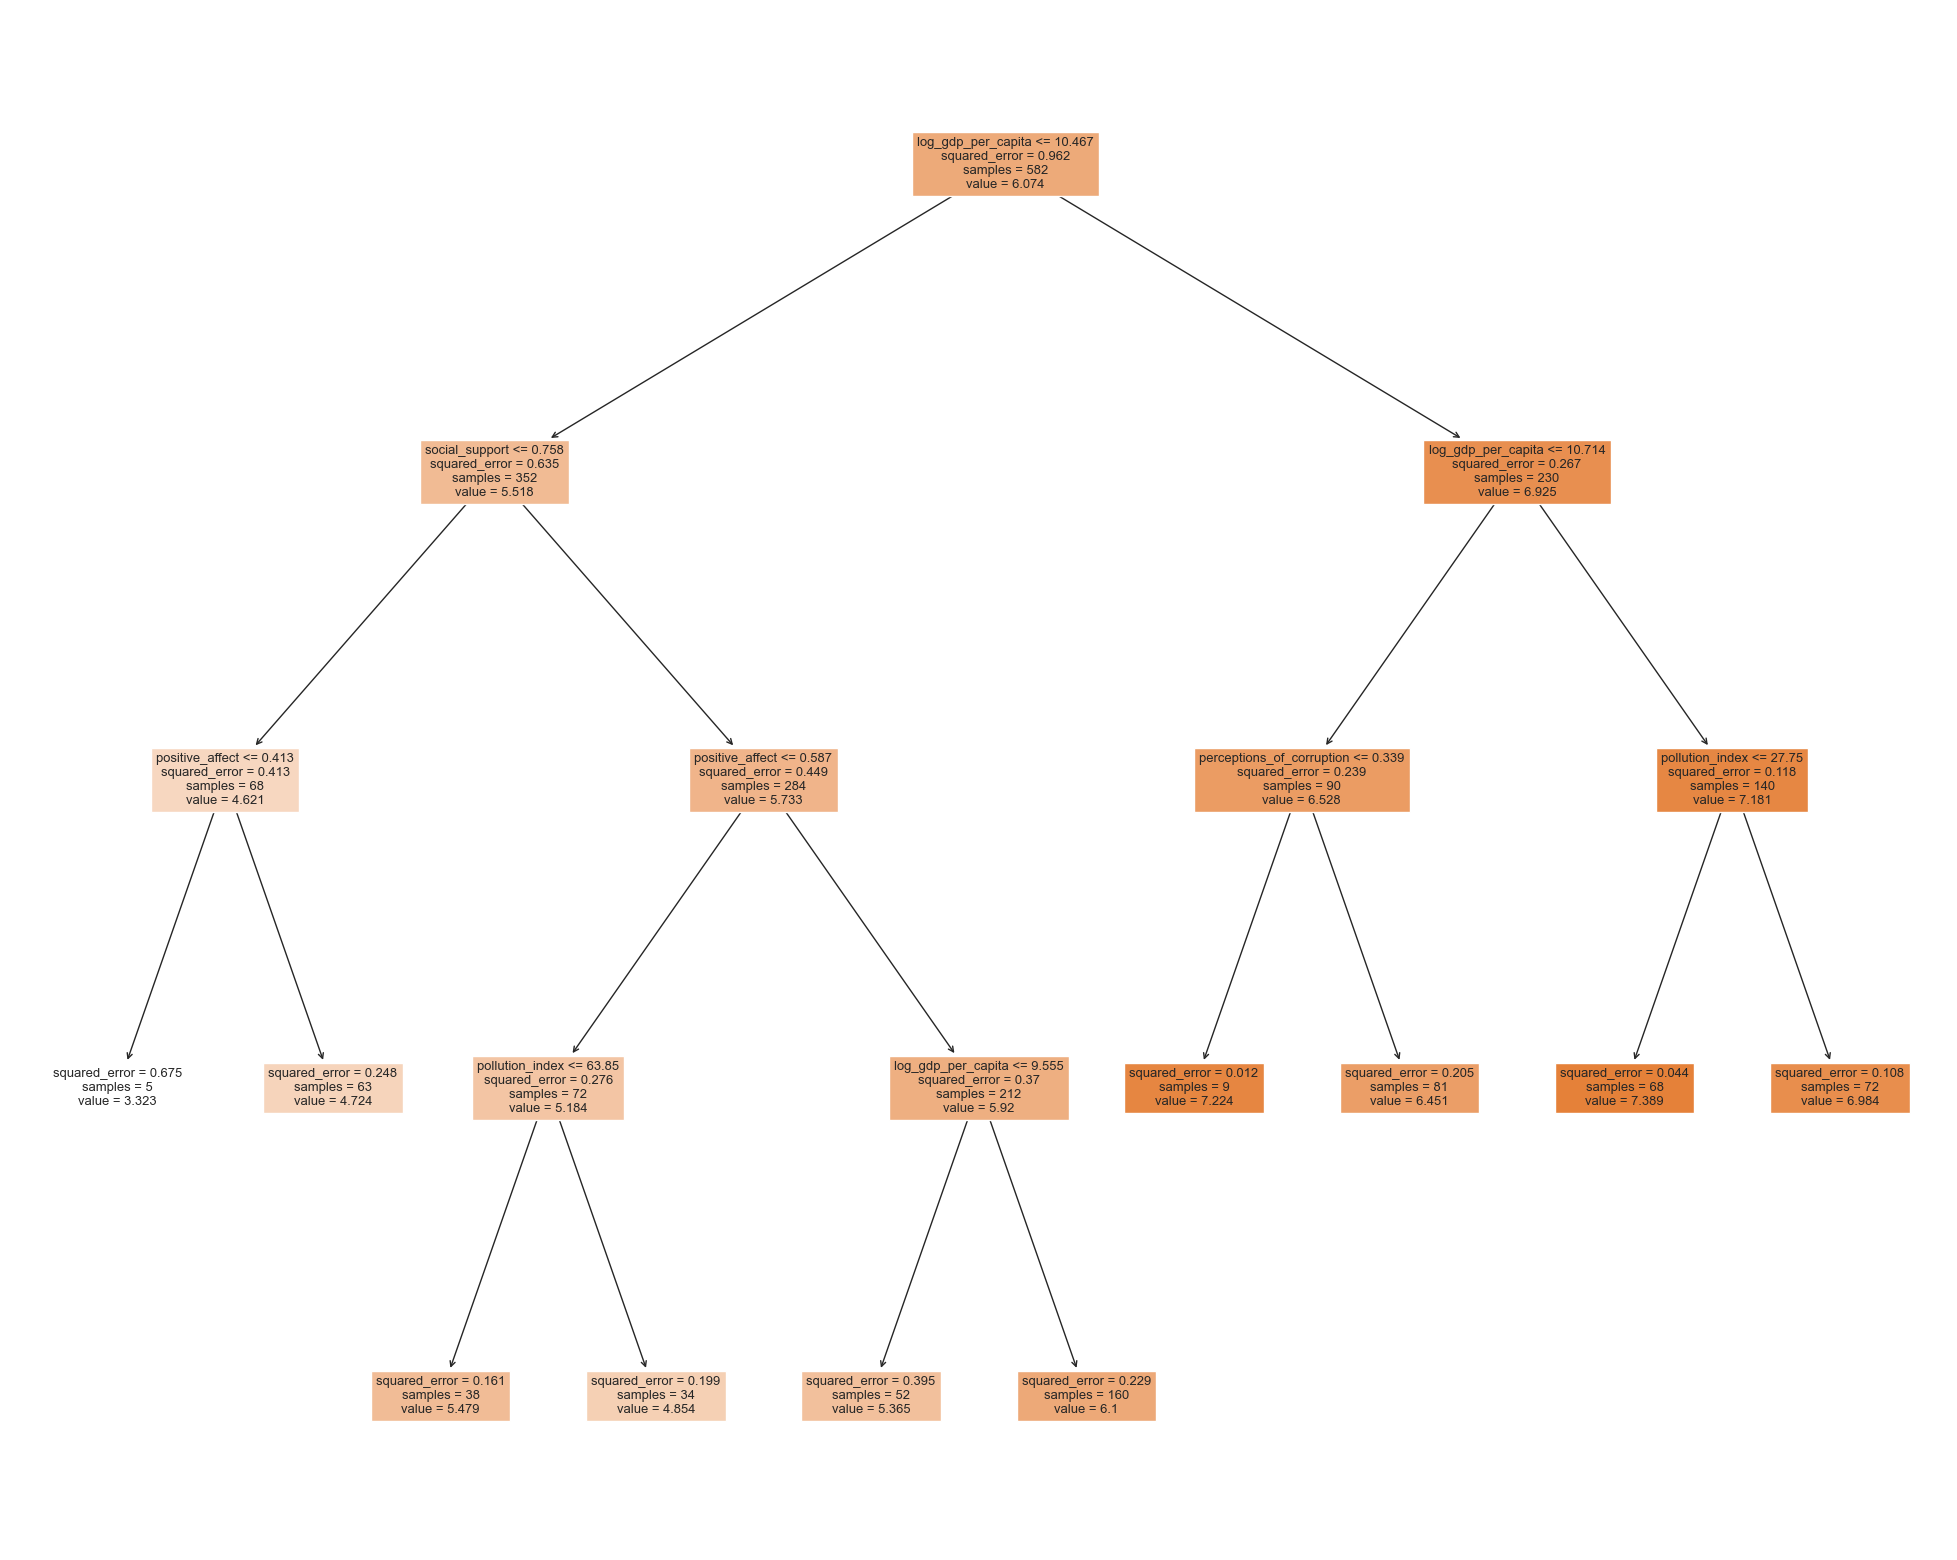

In [28]:
fig = plt.figure(figsize=(25,20))
dtree_plot = plot_tree(dtree, filled=True,
                       feature_names=X_train.columns)

In [29]:
dectree_error_lst = []
for depth in np.arange(3,5,1):
    for leaf in np.arange(10,46,5): 
        dectree = DecisionTreeRegressor(
                            max_depth = depth, 
                            max_leaf_nodes = leaf,
                            splitter = 'best')
        dectree.fit(X_train, y_train)
        y_pred_dec_test = dectree.predict(X_test)
        y_pred_dec_train = dectree.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_dectree_dep_' + str(depth) + '_max_leaf_' + str(leaf)
        dectree_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})
        

dectree_error_df = pd.DataFrame(dectree_error_lst)
dectree_error_df.sort_values(by = ['delta_MAE', 'test_mae'] , ascending=[True, True])
#dectree_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
10,model_15_dectree_dep_4_max_leaf_20,0.419,0.814,0.315,0.056,0.432,0.811,0.332,0.059,0.013,0.017,0.003
11,model_15_dectree_dep_4_max_leaf_25,0.419,0.814,0.315,0.056,0.432,0.811,0.332,0.059,0.013,0.017,0.003
12,model_15_dectree_dep_4_max_leaf_30,0.419,0.814,0.315,0.056,0.432,0.811,0.332,0.059,0.013,0.017,0.003
13,model_15_dectree_dep_4_max_leaf_35,0.419,0.814,0.315,0.056,0.432,0.811,0.332,0.059,0.013,0.017,0.003
14,model_15_dectree_dep_4_max_leaf_40,0.419,0.814,0.315,0.056,0.432,0.811,0.332,0.059,0.013,0.017,0.003
15,model_15_dectree_dep_4_max_leaf_45,0.419,0.814,0.315,0.056,0.432,0.811,0.332,0.059,0.013,0.017,0.003
9,model_15_dectree_dep_4_max_leaf_15,0.419,0.814,0.316,0.056,0.432,0.811,0.333,0.059,0.013,0.017,0.003
8,model_15_dectree_dep_4_max_leaf_10,0.448,0.788,0.342,0.061,0.461,0.784,0.360,0.065,0.013,0.018,0.004
0,model_15_dectree_dep_3_max_leaf_10,0.499,0.737,0.373,0.067,0.514,0.731,0.392,0.071,0.015,0.019,0.006
1,model_15_dectree_dep_3_max_leaf_15,0.499,0.737,0.373,0.067,0.514,0.731,0.392,0.071,0.015,0.019,0.006


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_52271/2885455363.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


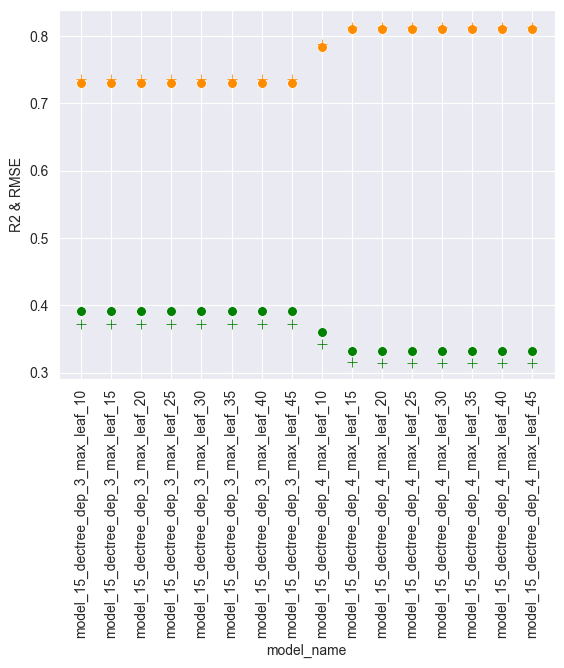

In [30]:
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

part df for the best models:

In [31]:
#part_dec_tree = dectree_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:6]
part_dec_tree = dectree_error_df.sort_values(by = ['delta_MAE', 'test_mae'] , ascending=[True, True]).iloc[:6]
part_dec_tree

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
10,model_15_dectree_dep_4_max_leaf_20,0.419,0.814,0.315,0.056,0.432,0.811,0.332,0.059,0.013,0.017,0.003
11,model_15_dectree_dep_4_max_leaf_25,0.419,0.814,0.315,0.056,0.432,0.811,0.332,0.059,0.013,0.017,0.003
12,model_15_dectree_dep_4_max_leaf_30,0.419,0.814,0.315,0.056,0.432,0.811,0.332,0.059,0.013,0.017,0.003
13,model_15_dectree_dep_4_max_leaf_35,0.419,0.814,0.315,0.056,0.432,0.811,0.332,0.059,0.013,0.017,0.003
14,model_15_dectree_dep_4_max_leaf_40,0.419,0.814,0.315,0.056,0.432,0.811,0.332,0.059,0.013,0.017,0.003
15,model_15_dectree_dep_4_max_leaf_45,0.419,0.814,0.315,0.056,0.432,0.811,0.332,0.059,0.013,0.017,0.003


Random Forest 

randforest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = 4,
                                max_leaf_nodes = 20,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
randforest.fit(X_train, y_train)

n_nodes = []
maximum_depths = []

# Stats about the trees in random forest
for tree_idx in randforest.estimators_:
    n_nodes.append(tree_idx.tree_.node_count)
    maximum_depths.append(tree_idx.tree_.max_depth)

y_pred_randforest_test = randforest.predict(X_test)
y_pred_randforest_train = randforest.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_randforest_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_randforest_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_randforest_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_randforest_train, X_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_randforest_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_randforest_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_randforest_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_randforest_train).round(3)

print(f'Min number of nodes: {int(np.min(n_nodes))}')
print(f'Average number of nodes: {int(np.mean(n_nodes))}')
print(f'Max number of nodes: {int(np.max(n_nodes))}')
print(f'Min maximum depth: {int(np.min(maximum_depths))}')
print(f'Average maximum depth: {int(np.mean(maximum_depths))}')
print(f'Max maximum depth: {int(np.max(maximum_depths))}')
print(f'Number of Trees: {len(randforest.estimators_)}')
print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

In [32]:
random_trees_error_lst = []
for tree_depth in np.arange(4,6,1):
    for tree_leaf in np.arange(10,21,5): 
        random_forest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = tree_depth,
                                max_leaf_nodes = tree_leaf,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
        random_forest.fit(X_train, y_train)
        
        y_pred_random_forest_test = random_forest.predict(X_test)
        y_pred_random_forest_train = random_forest.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_random_forest_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_random_forest_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_random_forest_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_random_forest_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_random_forest_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_random_forest_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_random_forest_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_random_forest_train).round(3)
        
        n_nodes = []
        maximum_depths = []

        for tree_idx in random_forest.estimators_:
            n_nodes.append(tree_idx.tree_.node_count)
            maximum_depths.append(tree_idx.tree_.max_depth)
        
        mean_node_num = int(np.mean(n_nodes))
        mean_depth = int(np.mean(maximum_depths))
        num_of_trees = len(random_forest.estimators_)

        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_forest_tree_depth' + str(tree_depth) + '_max_leaf_' + str(tree_leaf)
        random_trees_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2,
                      'mean_node_num': mean_node_num,
                      'mean_depth': mean_depth,
                      'num_of_trees': num_of_trees}) 
        

random_trees_error_df = pd.DataFrame(random_trees_error_lst)
random_trees_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True])
#random_trees_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[P

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
0,model_15_forest_tree_depth4_max_leaf_10,0.411,0.821,0.315,0.057,0.480,0.767,0.369,0.068,0.069,0.054,0.054,19,4,100
2,model_15_forest_tree_depth4_max_leaf_20,0.387,0.841,0.293,0.053,0.457,0.788,0.349,0.064,0.070,0.056,0.053,29,4,100
1,model_15_forest_tree_depth4_max_leaf_15,0.388,0.841,0.294,0.053,0.457,0.788,0.350,0.064,0.069,0.056,0.053,28,4,100
3,model_15_forest_tree_depth5_max_leaf_10,0.404,0.827,0.310,0.056,0.478,0.768,0.368,0.067,0.074,0.058,0.059,19,4,100
4,model_15_forest_tree_depth5_max_leaf_15,0.364,0.860,0.279,0.050,0.445,0.799,0.338,0.062,0.081,0.059,0.061,29,5,100
5,model_15_forest_tree_depth5_max_leaf_20,0.342,0.876,0.261,0.047,0.426,0.816,0.321,0.059,0.084,0.060,0.060,39,5,100


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_52271/4267177350.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


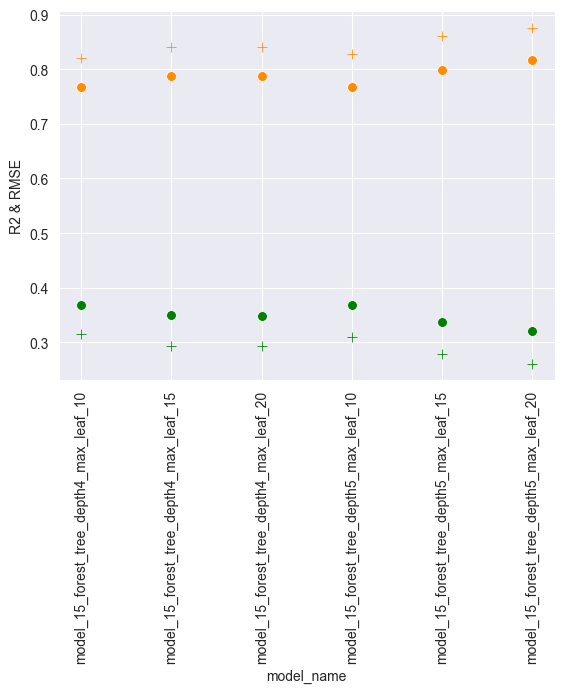

In [33]:
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

In [34]:
#part_forest = random_trees_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:4]
part_forest = random_trees_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True]).iloc[:6]
part_forest

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
0,model_15_forest_tree_depth4_max_leaf_10,0.411,0.821,0.315,0.057,0.480,0.767,0.369,0.068,0.069,0.054,0.054,19,4,100
2,model_15_forest_tree_depth4_max_leaf_20,0.387,0.841,0.293,0.053,0.457,0.788,0.349,0.064,0.070,0.056,0.053,29,4,100
1,model_15_forest_tree_depth4_max_leaf_15,0.388,0.841,0.294,0.053,0.457,0.788,0.350,0.064,0.069,0.056,0.053,28,4,100
3,model_15_forest_tree_depth5_max_leaf_10,0.404,0.827,0.310,0.056,0.478,0.768,0.368,0.067,0.074,0.058,0.059,19,4,100
4,model_15_forest_tree_depth5_max_leaf_15,0.364,0.860,0.279,0.050,0.445,0.799,0.338,0.062,0.081,0.059,0.061,29,5,100
5,model_15_forest_tree_depth5_max_leaf_20,0.342,0.876,0.261,0.047,0.426,0.816,0.321,0.059,0.084,0.060,0.060,39,5,100


Test: AdaBoostRegressor

In [35]:
ada = AdaBoostRegressor(n_estimators=100, random_state=8)
ada.fit(X_train, y_train)

y_pred_ada_test = ada.predict(X_test)
y_pred_ada_train = ada.predict(X_train)

ada_boost_error = pd.DataFrame([{'model_name': model_name + '_ada_boost', 
                    'train_rmse': mean_squared_error(y_train, y_pred_ada_train, squared=False).round(3), 
                    'train_r2':r2_score(y_train, y_pred_ada_train).round(3), 
                    'train_mae': mean_absolute_error(y_train, y_pred_ada_train).round(3),
                    'train_mape': mean_absolute_percentage_error(y_train, y_pred_ada_train).round(3),
                    'test_rmse': mean_squared_error(y_test, y_pred_ada_test, squared=False).round(3), 
                    'test_r2':r2_score(y_test, y_pred_ada_test).round(3),
                    'test_mae': mean_absolute_error(y_test, y_pred_ada_test).round(3),
                    'test_mape': mean_absolute_percentage_error(y_test, y_pred_ada_test).round(3)
                    }])

ada_boost_error['delta_RMSE'] = abs(ada_boost_error['train_rmse'] - ada_boost_error['test_rmse'])
ada_boost_error['delta_R2'] = abs(ada_boost_error['train_r2'] - ada_boost_error['test_r2'])
ada_boost_error['delta_MAE'] = abs(ada_boost_error['train_mae'] - ada_boost_error['test_mae'])
ada_boost_error

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_R2,delta_MAE
0,model_15_ada_boost,0.356,0.868,0.298,0.052,0.444,0.815,0.349,0.061,0.088,0.053,0.051


that is really nice!!

In [36]:
ada.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 100,
 'random_state': 8}

Test:  GradientBoostingRegressor

In [37]:
gbr = GradientBoostingRegressor(n_estimators=100,
                                criterion= 'squared_error',
                                max_depth = 4, 
                                max_leaf_nodes = 14,
                                random_state=123)
gbr.fit(X_train, y_train)


y_pred_gbr_test = gbr.predict(X_test)
y_pred_gbr_train = gbr.predict(X_train)

gbr_boost_error = pd.DataFrame([{'model_name': model_name + '_gbr_boost', 
                      'train_rmse': mean_squared_error(y_train, y_pred_gbr_train, squared=False).round(3), 
                      'train_r2':adjusted_r2(y_train, y_pred_gbr_train, X_train).round(3), 
                      'test_rmse': mean_squared_error(y_test, y_pred_gbr_test, squared=False).round(3), 
                      'test_r2':adjusted_r2(y_test, y_pred_gbr_test, X_test).round(3)}])

gbr_boost_error['delta_RMSE'] = abs(gbr_boost_error['train_rmse'] - gbr_boost_error['test_rmse'])
gbr_boost_error['delta_R2'] = abs(gbr_boost_error['train_r2'] - gbr_boost_error['test_r2'])
gbr_boost_error


,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_15_gbr_boost,0.129,0.982,0.346,0.878,0.217,0.104


In [38]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': 14,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 123,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Concat the optimal models of each algorithm to one big error_df:  

In [39]:
error_df = pd.concat([part_lin_reg, 
                      part_knn,
                      part_dec_tree,
                      part_forest,
                      ada_boost_error,
                      gbr_boost_error],  axis = 0)
                      
error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])


,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
10,model_15_dectree_dep_4_max_leaf_20,0.419,0.814,0.315,0.056,0.432,0.811,0.332,0.059,0.013,0.017,0.003,NaN,NaN,NaN
11,model_15_dectree_dep_4_max_leaf_25,0.419,0.814,0.315,0.056,0.432,0.811,0.332,0.059,0.013,0.017,0.003,NaN,NaN,NaN
12,model_15_dectree_dep_4_max_leaf_30,0.419,0.814,0.315,0.056,0.432,0.811,0.332,0.059,0.013,0.017,0.003,NaN,NaN,NaN
13,model_15_dectree_dep_4_max_leaf_35,0.419,0.814,0.315,0.056,0.432,0.811,0.332,0.059,0.013,0.017,0.003,NaN,NaN,NaN
14,model_15_dectree_dep_4_max_leaf_40,0.419,0.814,0.315,0.056,0.432,0.811,0.332,0.059,0.013,0.017,0.003,NaN,NaN,NaN
15,model_15_dectree_dep_4_max_leaf_45,0.419,0.814,0.315,0.056,0.432,0.811,0.332,0.059,0.013,0.017,0.003,NaN,NaN,NaN
1,model_15_knn_1_10,0.355,0.866,0.252,0.047,0.412,0.828,0.295,0.056,0.057,0.043,0.038,NaN,NaN,NaN
6,model_15_knn_2_10,0.358,0.864,0.255,0.047,0.425,0.817,0.303,0.057,0.067,0.048,0.047,NaN,NaN,NaN
0,model_15_lin_reg_1,0.462,0.774,0.333,0.060,0.520,0.725,0.377,0.069,0.058,0.044,0.049,NaN,NaN,NaN
2,model_15_forest_tree_depth4_max_leaf_20,0.387,0.841,0.293,0.053,0.457,0.788,0.349,0.064,0.070,0.056,0.053,29.0,4.0,100.0


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_52271/4059825178.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


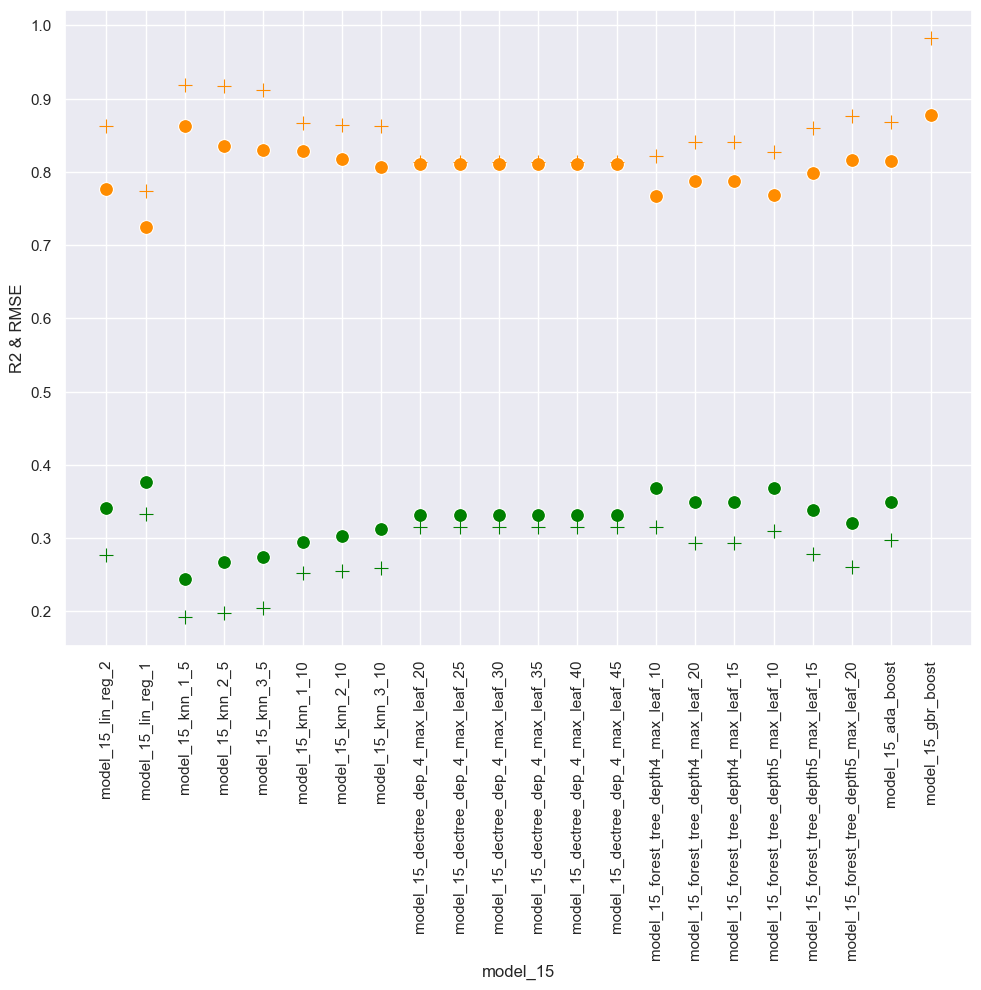

In [40]:
g=sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_mae', color = 'green', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s=100)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
g.set(xlabel=model_name)
plt.show();

In [41]:
error_df[error_df['test_mape']==error_df['test_mape'].min()]

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
0,model_15_knn_1_5,0.277,0.919,0.192,0.036,0.368,0.862,0.244,0.046,0.091,0.052,0.057,NaN,NaN,NaN


In [42]:
error_df.to_csv(f'Metrics_Summary_{model_name}.txt', index=False)

In [43]:
et_clf = ExtraTreesRegressor(n_estimators=300)
et_clf = et_clf.fit(X_train, y_train)
feature_importances = et_clf.feature_importances_
fi_lst = []
for idx, i in enumerate(X_train.columns.to_list()):
    fi_lst.append({'feature_name': i, 'feature_importance': feature_importances[idx]})
    #print(i, feature_importances[idx])
feature_df = pd.DataFrame(fi_lst)
feature_df.sort_values('feature_importance')

,feature_name,feature_importance
10,crime_index,0.023283
9,health_care_index,0.030920
5,negative_affect,0.033989
8,pollution_index,0.053985
7,cost_of_living_index,0.065839
6,purchasing_power_index,0.069315
2,healthy_life_expectancy_at_birth,0.090949
4,positive_affect,0.122360
1,social_support,0.132738
3,perceptions_of_corruption,0.138159


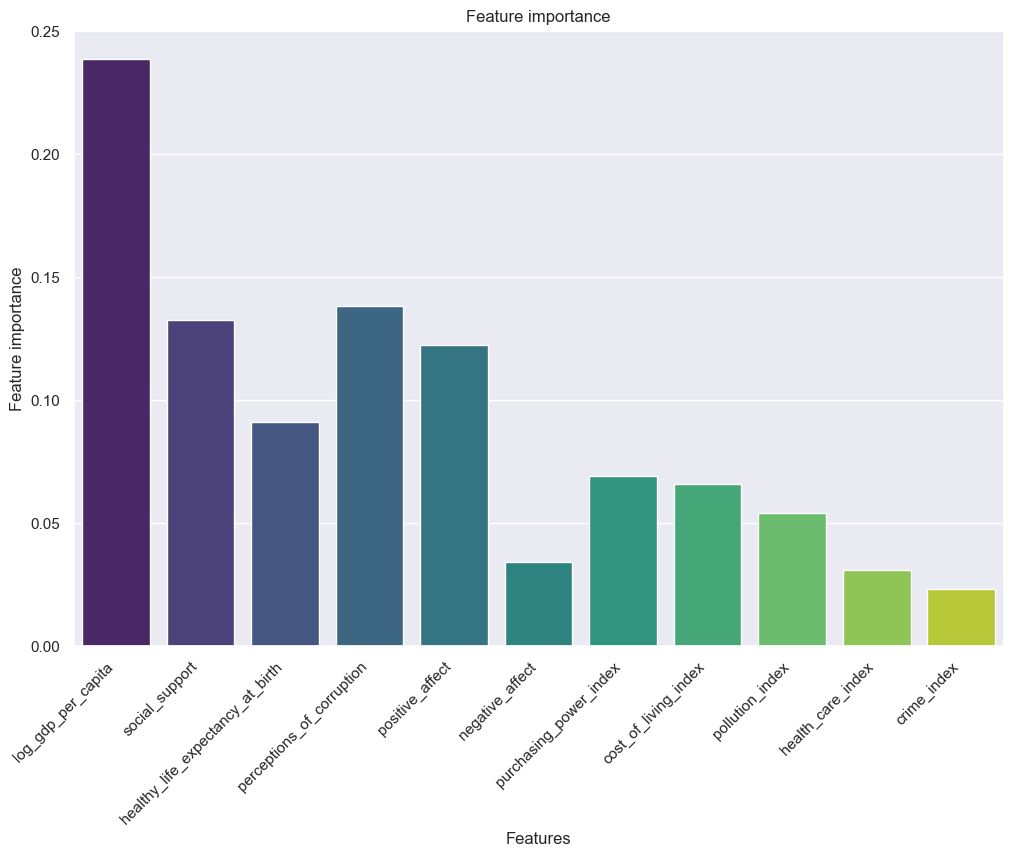

In [44]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_df['feature_name'],
            y=feature_df['feature_importance'].sort_values(ascending=False),
            palette="viridis")
plt.title('Feature importance')
plt.xlabel('Features')
plt.ylabel('Feature importance')
plt.xticks(rotation=45, ha="right")
plt.show()